<a href="https://colab.research.google.com/github/20wh1a05d0/fmml20220063/blob/main/FMML20220063_Aug22_M1Lab3_Terms%26Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 3<br>
Module Coordinator: Amit Pandey amit.pandey@research.iiit.ac.in <br>
<br>

 In this lab, we will show a part of the ML pipeline by extracting features, training and testing. We will also explore how data augmentation affects accuracy.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. 

Let us download and examine the dataset. 

In [ ]:
 dataset =  datasets.fetch_california_housing()
 print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Here is a function for calculating the 1-nearest neighbours

In [ ]:
type(dataset), dataset.DESCR

(sklearn.utils.Bunch,
 '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousan

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel



5,5
6,6
8,9


0,0

(0, 0)

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. 

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')
print('Test data = ',len(testdata))

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %
Test data =  4144


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
print('Number of validation samples = ', len(vallabel))
print('Number of other samples = ', len(alltrainlabel))
print('Number of dataset.target samples = ', len(dataset.target))
print('Number of train samples = ', len(alltraindata))
print('Number of train labels = ', len(alltrainlabel))
print('Percent of validation data = ', len(vallabel)*100/len(dataset.target),'%')

Number of validation samples =  4128
Number of other samples =  16496
Number of dataset.target samples =  20640
Number of train samples =  16496
Number of train labels =  16496
Percent of validation data =  20.0 %


What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

ValueError: ignored

In [ ]:
5,5 - A
6,6 -B
7,7 -C



8,8 - A | C
0,0 -B | A   - 0


10,10     -A
15,15     -C

NameError: ignored

## Interesting: See how train accuracy of nearest neighbour is 1 i.e. 100%. Ponder and Explain.

For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. 

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits. 
We notice that the accuracy is different for each run, but close together. 

Now let us compare it with the accuracy we get on the test dataset. 

In [ ]:

testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy of nearest neighbour is ', testAccuracy)

testpred = RandomClassifier(traindata, trainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print("Test accuracy using random classifier is ", testAccuracy)

Test accuracy of nearest neighbour is  0.34917953667953666
Test accuracy using random classifier is  0.15757722007722008


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced? 

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

In [ ]:
#Validation set increase: 
#(When validation data is 50 percent and train data is 30 percent):


#Validation data
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/200)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

#Training data
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

#Test data
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy of nearest neighbour is ', testAccuracy)

testpred = RandomClassifier(traindata, trainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print("Test accuracy using random classifier is ", testAccuracy)

Validation accuracy of nearest neighbour is  0.31421373897878113
Validation accuracy using random classifier is  0.16442205212673192
Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.16647773279352227
Test accuracy of nearest neighbour is  0.34917953667953666
Test accuracy using random classifier is  0.15588803088803088


In [ ]:
#Validation set decrease
#(When validation data is 10 percent and train data is 70 percent):

#Validation data
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 25/200)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

#Training data
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

#Test data
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy of nearest neighbour is ', testAccuracy)

testpred = RandomClassifier(traindata, trainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print("Test accuracy using random classifier is ", testAccuracy)



Validation accuracy of nearest neighbour is  0.30056999860975947
Validation accuracy using random classifier is  0.16759349367440568
Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.16492890995260664
Test accuracy of nearest neighbour is  0.34917953667953666
Test accuracy using random classifier is  0.1718146718146718


In [ ]:
##FOR EXTREME CASES
#Training and validation data is 99.9 percent and test data is 0.01 Percent
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 1/100)
#Validation data
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

#Training data
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

#Test data
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy of nearest neighbour is ', testAccuracy)

testpred = RandomClassifier(traindata, trainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print("Test accuracy using random classifier is ", testAccuracy)

Validation accuracy of nearest neighbour is  0.35036352918058555
Validation accuracy using random classifier is  0.17410100216152485
Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.1670912535110066
Test accuracy of nearest neighbour is  0.3677685950413223
Test accuracy using random classifier is  0.19008264462809918


In [ ]:
'''Observation when Split is done for 99.9 percent(Extreme condition):

At different runs, we got different values like:
Validation accuracy of nearest neighbour is: 0.3428, 0.3503, 0.3488
Validation accuracy using random classifier is  0.1678, 0.1683, 0.1741
Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.1696, 0.1683, 0.1740
Test accuracy of nearest neighbour is  0.3333, 0.3453, 0.3677
Test accuracy using random classifier is  0.1743, 0.2113, 0.1900'''

'''When validation and training data is 99.9 percent and test data is 0.01 percent, the accuracy of validation and
 training data increases by 0.1 to 0.5 percent'''

In [ ]:
#1. When validation set percentage increases from 20 percent to 50 percent:
'''At different runs, we got different values like:
Validation accuracy(For nearest neighbour): 0.3175, 0.3244, 0.3270, 0.3182
Validation accuracy(For random classifier): 0.1665, 0.1601, 0.1642, 0.1686, 0.1699

When validation set percentage is increased to 50 percent:
For nearest neighbour,
the values decreased by 0.02 percent compared to when the validation data percent was 20 percent
For random classifier,
the values are almost same as values when the validation data percent was 20 percent'''

'At different runs, we got different values like:\nValidation accuracy(For nearest neighbour): 0.3175, 0.3244, 0.3270, 0.3182\nValidation accuracy(For random classifier): 0.1665, 0.1601, 0.1642, 0.1686, 0.1699\n\nWhen validation set percentage is increased to 50 percent:\nFor nearest neighbour,\nthe values decreased by 0.02 percent compared to when the validation data percent was 20 percent\nFor random classifier,\nthe values are almost same as values when the validation data percent was 20 percent'

In [ ]:
#1. When validation set percentage increases from 20 percent to 10 percent:
'''At different runs, we got different values like:
Validation accuracy(For nearest neighbour): 0.2985, 0.3026, 0.2962, 0.2928
Validation accuracy(For random classifier): 0.1663, 0.1699, 0.1667, 0.1681, 0.1686

When validation set percentage is decreased to 10 percent:
For nearest neighbour,
the values decreased by 0.04 to 0.1 percent compared to when the validation data percent was 20 percent. 
But,there is only a slight change. It does not vary a lot.
For random classifier,
the values are almost same as values when the validation data percent was 20 percent'''

'At different runs, we got different values like:\nValidation accuracy(For nearest neighbour): 0.2985, 0.3026, 0.2962, 0.2928\nValidation accuracy(For random classifier): 0.1663, 0.1699, 0.1667, 0.1681, 0.1686\n\nWhen validation set percentage is decreased to 10 percent:\nFor nearest neighbour,\nthe values decreased by 0.04 to 0.1 percent compared to when the validation data percent was 20 percent. \nBut,there is only a slight change. It does not vary a lot.\nFor random classifier,\nthe values are almost same as values when the validation data percent was 20 percent'

In [ ]:
#2.How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
'''As we can observe, when the validation sets  percent are at 50, 10 or 20 when the split is 60-20-20
and when validation data percent is 24 percent when the split is 75.99-24-0.01 for training-validation-test 
data at extreme conditions, the value of test data is constant. 
Mostly, the value for nearest neighbour is 1.0 and for random classifier is 0.3491.
So, we can conclude that test accuracy is constant and independent from size of train and validation data.'''

'As we can observe, when the validation sets  percent are at 50, 10 or 20 when the split is 60-20-20\nand when validation data percent is 24 percent when the split is 75.99-24-0.01 for training-validation-test \ndata at extreme conditions, the value of test data is constant. \nMostly, the value for nearest neighbour is 1.0 and for random classifier is 0.3491.\nSo, we can conclude that test accuracy is constant and independent from size of train and validation data.'

In [ ]:
#3.What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?
'''It is better to start with 80-10-10 split for training, validation and test data.
The ideal ratio is 70% for training and 30 percent for validation and test.
The dataset split ratio depends on the number of samples present in the dataset and the model.
If there are many hyperparameters or if the model is complex, then we need larger validation set or else it would be easy to validate small set of data.
But, if false prediction drastically changes the performance of model, then we have to validate the data after every epoch.
The validation data should not be less as our model model performance statistic will have greater variance.
So, we have to split the data which suits our requirements and model needs.'''

'It is better to start with 80-10-10 split for training, validation and test data.\nThe ideal ratio is 70% for training and 30 percent for validation and test.\nThe dataset split ratio depends on the number of samples present in the dataset and the model.\nIf there are many hyperparameters or if the model is complex, then we need larger validation set or else it would be easy to validate small set of data.\nBut, if false prediction drastically changes the performance of model, then we have to validate the data after every epoch.\nThe validation data should not be less as our model model performance statistic will have greater variance.\nSo, we have to split the data which suits our requirements and model needs.'

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. 

In [ ]:
100 --- 80 --- 75|5.   12345, 1234|5. 2345|1, 1345|2

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 5, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3483765985278243
test accuracy is  0.3677685950413223


In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 9, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3475024674610536
test accuracy is  0.3677685950413223


In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.34609931200253646
test accuracy is  0.3677685950413223


In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 11, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3451191574070481
test accuracy is  0.3677685950413223


In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 20, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.34478400753740424
test accuracy is  0.3677685950413223


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


In [ ]:
#Answers:

In [ ]:
#1.Does averaging the validation accuracy across multiple splits give more consistent results?
'''Yes, averaging the validation accuracy across multiple splits give more consistent results as the variance of the proposed 
estimates can be significantly reduced compared to classical K-fold cross validation procedure. We can also observe that Average
 validation accuracy is '''

In [ ]:
#2.Does it give more accurate estimate of test accuracy?
'''Yes, it gives more accurate estimate of test accuracy as model is trained and evaluated “K” times on different samples. 
In Cross validation: If k = 5, we will create 5 complete datasets (labeled as Datasets 1-5) and name eash dataset as
 d1,d2,d3,d4 and d5. For Dataset-1, use d1 as the validation set, and consolidate Parts 2-5 to create the training set. 
 For Dataset-2, use Part-2 as the validation set, and consolidate Parts 1, 3, 4 and 5 to create the training set, and so on. 
 So, we train and validate the model even in case of class-imbalanced datasets.'''

In [ ]:
#3.What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
'''As the number of iterations are increasing, the average test accuracy value is decreasing. We can use higher iterations 
and it gives better estimate as it is less bias towards overestimating the true expected error. Larger k value means less
bias towards overestimating the true expected error It is always suggested that the value of k should be 10 as the lower 
value of k is takes towards validation and higher value of k leads to LOOCV method. But it becomes extremely computationally
expensive and time-consuming. I would conclude by saying that if our dataset is large, it's better to choose smaller values 
for k'''

In [ ]:
#4.Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?
'''If there is a small train dataset or validation dataset, we can increase the number of iterations which will result in 
lowering the bias and more accuracy. But, as mentioned already, the increase the run-time and variance of our estimate
 increases.'''

## Now let us see how augmentation affects accuracy. We will pick components from what we studied in the last module

we will experiment with MNIST dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print(train_X[0].shape,train_y[0])



(28, 28) 5


In [ ]:
train_X = train_X/255
test_X = test_X/255

#train_X[0].shape, train_X[0]

In [ ]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

In [ ]:
## Augmentation functions:



def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.


def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  traindata = traindata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [ ]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

def augShear(sample, shearconstraint):
  if shearconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = shear(sample[ii], amt[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.




In this lab, we will use the image pixels themselves as features, instead of extracting features. Each image has 28*28 pixels, so we will flatten them to 784 pixels to use as features. Note that this is very compute intensive and will take a long time.

Let us check the baseline accuracy on the test set without any augmentations. We hope that adding augmentations will help us to get better results.

In [ ]:
testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy without augmentation is ', Accuracy(test_y, testpred))

Baseline accuracy without augmentation is  0.2724


Let us try to improve this accuracy using augmentations. When we create augmentations, we have to make sure that the changes reflect what will naturally occur in the dataset. For example, we should not add colour to our samples as an augmentation because they do not naturally occur. We should not also flip the images in MNIST, because flipped images have different meanings for digits.

Let us augment the whole dataset and see if this improves the test accuracy

In [ ]:
# hyperparameters
angleconstraint = 60
naugmentations = 5

# augment
augdata = train_X # we include the original images also in the augmented dataset
auglabel = train_y
for ii in range(naugmentations):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconstraint))) # concatenate the augmented data to the set
  auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

# check the test accuracy
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation augmentation is ', Accuracy(test_y, testpred))

shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594 0.37079802 0.92676499
 0.64386512 0.82276161 0.4434142  0.22723872 0.55458479 0.06381726
 0.82763117 0.6316644  0.75808774 0.35452597 0.97069802 0.89312112
 0.7783835  0.19463871 0.466721   0.04380377 0.15428949 0.68304895
 0.74476216 0.96750973 0.32582536 0.37045971 0.46955581 0.18947136
 0.12992151 0.47570493 0.22690935 0.66981399 0.43715192 0.8326782
 0.7002651  0.31236664 0.8322598  0.80476436 0.38747838 0.2883281
 0.6824955  0.13975248]
angle with constraint is: [ 16.43736291  -3.66729361  21.51587519  11.84208174 -24.34935913
  28.5373411   15.66838212  17.16385832 -22.31318204  -2.97684373
  -7.75211855  25.60589933   8.6319072   19.3656968   -3.39514807
 -16.36567669   3.27508722 -26.17096463  19.65787032   7.89986395
  15.48526441  -8.72844191  28.24188146  23.58726728  16.70300982
 -18.32167753  -

The angle constraint is a hyperparameter which we have to tune using a validation set. (Here we are not doing that for time constraints). Let us try a grid search to find the best angle constraint.

In [ ]:
angleconstraints = [0,10,20,30,40,50,60,70,80,90] # the values we want to test
accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here

for ii in range(len(angleconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[ii], ' is ', accuracies[ii], flush=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Accuracy after rotation augmentation constrained by  0  is  0.1393
shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.69085458 0.63652826 0.63114486 0.206704   0.57934659 0.62553835
 0.57040532 0.18616247 0.7230606  0.07324316 0.59120001 0.43625933
 0.25028659 0.80738899 0.17589257 0.93298176 0.88456503 0.36058755
 0.30515293 0.13748668 0.91632782 0.62753186 0.03178358 0.51099941
 0.08579895 0.57375068 0.50896172 0.08284605 0.81586059 0.26231718
 0.54148436 0.63903888 0.96230453 0.49381169 0.91731577 0.35485734
 0.8574372  0.23582623 0.70747976 0.08861199 0.98605036 0.9539364
 0.44221364 0.52393522 0.59777486 0.27503756 0.67447144 0.69856195
 0.52507649 0.14774069]
angle with constraint is: [ 1.90854582  1.36528258  1.31144865 -2.93296     0.79346594  1.2553835
  0.70405317 -3.13837533  2.23060597 -4.26756838  0.91200012 -0.63740668
 -2.49713407  3.07388989 -3.24107433  4.3298176   3.84565028 -1.39412453
 -1.94847069 -3.62513317  4.16327816  1.27531859 -4.68216418

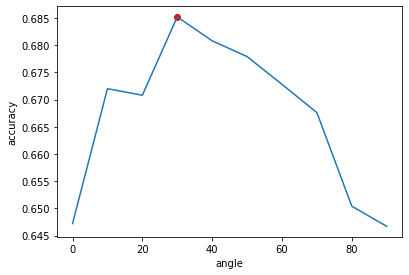

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c='red')

In [ ]:
'''Accuracy after rotation augmentation constrained by  90  is  0.6467'''

'Accuracy after rotation augmentation constrained by  90  is  0.6467'

Let us see the best value for angle constraint: (Ideally this should be done on validation set, not test set)

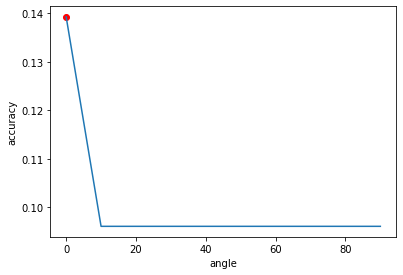

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c='red')

Let us do a grid search to find the best shear constraint.

In [ ]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0] # the values we want to test
accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here

for ii in range(len(shearconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after shear augmentation constrained by ',shearconstraints[ii], ' is ', accuracies[ii], flush=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Accuracy after shear augmentation constrained by  0  is  0.1393
Accuracy after shear augmentation constrained by  0.2  is  0.0961
Accuracy after shear augmentation constrained by  0.4  is  0.0961
Accuracy after shear augmentation constrained by  0.6  is  0.0961
Accuracy after shear augmentation constrained by  0.8  is  0.0961
Accuracy after shear augmentation constrained by  1.0  is  0.0961
Accuracy after shear augmentation constrained by  1.2  is  0.0961
Accuracy after shear augmentation constrained by  1.4  is  0.0961
Accuracy after shear augmentation constrained by  1.6  is  0.0961
Accuracy after shear augmentation constrained by  1.8  is  0.0961
Accuracy after shear augmentation constrained by  2.0  is  0.0961


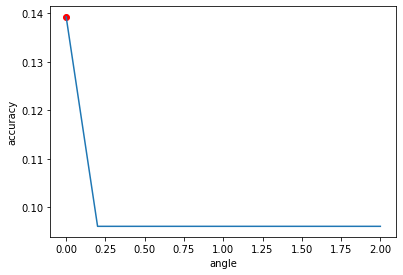

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(shearconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c='red')

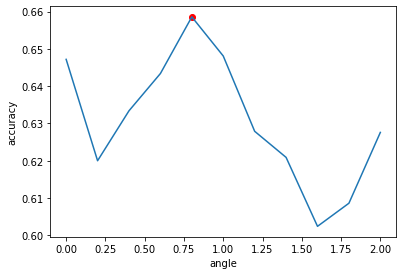

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(shearconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c='red')

We can do multiple augmentations at the same time. Here is a function to do both shear and rotation to the sample. In this case, we will have two hyperparameters.

In [ ]:
def augRotateShear(sample, angleconstraint, shearconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  angle = rng.random(len(sample)) # generate random numbers for angles
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(shear(sample[ii], amt[ii]), angle[ii]) # first apply shear, then rotate
  return np.squeeze(nsample) # take care if the input had only one sample.

Since we have two hyperparameters, we have to do the grid search on a 2 dimensional matrix. We can use our previous experience to inform where to search for the best hyperparameters. 

In [ ]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6] # the values we want to test
angleconstraints = [0,10,20,30,40,50,60] # the values we want to test
hyp = cartesian((shearconstraints, angleconstraints)) # cartesian product of both

accuracies = np.zeros(len(hyp), dtype=np.float) # we will save the values here

for ii in range(len(hyp)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after augmentation shear:',hyp[ii][0], 'angle:',hyp[ii][1], ' is ', accuracies[ii], flush=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


Accuracy after augmentation shear: 0.0 angle: 0.0  is  0.1278
Accuracy after augmentation shear: 0.0 angle: 10.0  is  0.0961
Accuracy after augmentation shear: 0.0 angle: 20.0  is  0.0961
Accuracy after augmentation shear: 0.0 angle: 30.0  is  0.0961
Accuracy after augmentation shear: 0.0 angle: 40.0  is  0.0961
Accuracy after augmentation shear: 0.0 angle: 50.0  is  0.0961
Accuracy after augmentation shear: 0.0 angle: 60.0  is  0.0961
Accuracy after augmentation shear: 0.2 angle: 0.0  is  0.0961
Accuracy after augmentation shear: 0.2 angle: 10.0  is  0.0961
Accuracy after augmentation shear: 0.2 angle: 20.0  is  0.0961
Accuracy after augmentation shear: 0.2 angle: 30.0  is  0.0961
Accuracy after augmentation shear: 0.2 angle: 40.0  is  0.0961
Accuracy after augmentation shear: 0.2 angle: 50.0  is  0.0961
Accuracy after augmentation shear: 0.2 angle: 60.0  is  0.0961
Accuracy after augmentation shear: 0.4 angle: 0.0  is  0.0961
Accuracy after augmentation shear: 0.4 angle: 10.0  is  0.

Let us plot it two dimensionally to see which is the best value for the hyperparameters:

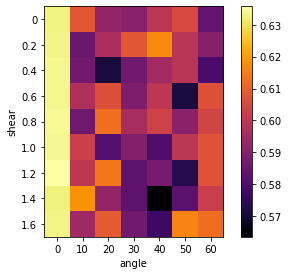

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
im = ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno') 
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)

It seems that rotation and shear don't mix! The best accuracy is when rotation is zero.

## Questions
Try these questions for better understanding. You may not be able to solve all of them. 
1. What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?
2. Can you increase the accuracy by increasing the number of augmentations from each sample?
3. Try implementing a few augmentations of your own and experimenting with them. A good reference is <a href=https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/>here. </a>
4. Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?

Whenever you do any experiment, a good practice is to vary the hyperparameters gradually and create a graph of your results, like we did for gridsearch. 

In [ ]:
#1.What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?
'''The best value for angle constraint is when angle is constrained by 30 degrees.
The accuracy inproved by 0.05 % when the rotation angle is constrained by 30 degrees compared to not using augmentation.
The best value for sheer constraint is when angle is constrained by 0.8 degrees.
The accuracy inproved by 0.01 % when the sheer angle is constrained by 0.8 degrees compared to not using augmentation.
When both are combined, it is better to have the angle constraint as zero.'''

In [ ]:
#2.Can you increase the accuracy by increasing the number of augmentations from each sample?
'''Yes, we can increase the accuracy by increasing the number of augmentations from each sample as it can lead 
to better prediction accuracy values when large size data sets are used.'''

In [ ]:
#3.Try implementing a few augmentations of your own and experimenting with them.

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(470, 790, 4)


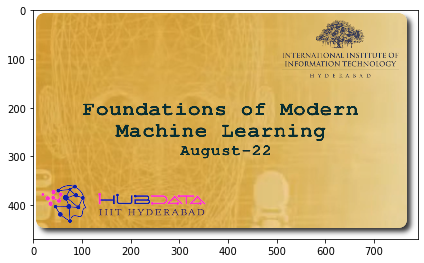

In [ ]:
import skimage.io as io 
Image = io.imread('/content/gdrive/MyDrive/fmml.png') 
io.imshow(Image)
print(Image.shape)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Wrap Shift')

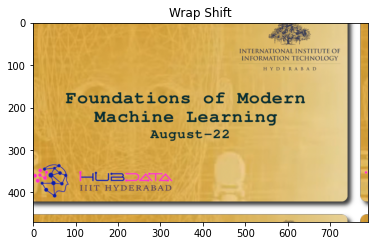

In [ ]:
#Apply Shift operation
transform = AffineTransform(translation=(25,25))
wrapShift = warp(Image,transform,mode='wrap')
plt.imshow(wrapShift)
plt.title('Wrap Shift')

Text(0.5, 1.0, 'Left to Right Flipped')

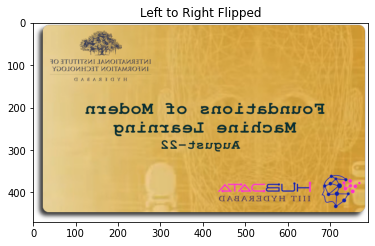

In [ ]:
#Flipping image left to right
flipLR = np.fliplr(Image)

plt.imshow(flipLR)
plt.title('Left to Right Flipped')

Text(0.5, 1.0, 'Up to Down Flipped')

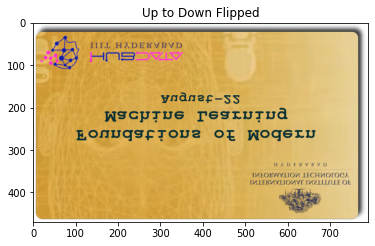

In [ ]:
#Flipping image up to down
flipUD = np.flipud(Image)

plt.imshow(flipUD)
plt.title('Up to Down Flipped')

Text(0.5, 1.0, 'Blurred Image')

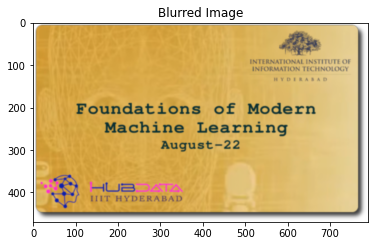

In [ ]:
#Blurring an image 
blurred = gaussian(Image,sigma=1,multichannel=True)

plt.imshow(blurred)
plt.title('Blurred Image')

In [ ]:
#function To combine two images:
'''def combine_image(image1,image2):
  h1 = image1.shape[0]
  w1 = image1.shape[1]
  channel1 = image1.shape[2]
  h2 = image2.shape[0]
  w2 = image2.shape[1]
  channel2 = image2.shape[2]
  n = 10
  new_h = h1 + h2 + n
  if(w1 > w2):
    new_w = w1
  else:
    new_w = w2

  new_image = np.zeroes((new_h,new_w,channel1), np.unit8)

  for x in range(0, h1):
    for y in range(0, w1):
      for c in range(channel1):
        new_image[x,y,c] = image1[x,y,c]    
        new_image[(x+h1+n),y,c] = image2[x,y,c]  

  for x in range(0, h2):
    for y in range(0, w2):
      for c in range(channel2):  
        new_image[(x+h1+n),y,c] = image2[x,y,c]      

  return new_image '''

In [ ]:
#4.Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?
'''The highest accuracy we can get achieves 99.8% accuracy using Convolutional neural network.
Good accuracy in machine learning is subjective. But in our opinion, anything greater than 70% is a great model performance. 
In fact, an accuracy measure of anything between 70%-90% is not only ideal, it's realistic.'''

'''Training on smaller datasets can be done by sampling techniques such as stratified sampling. 
It will speed up your training (because you use less data) and make your results more reliable.
The amount of training data you require is dependent on many different aspects 
Hence, there is no minimum or maximum for training sample size. Generally the more sample for training can ensure better performance
of system but make sure dont get over trained your network.'''
